# SMS Chat Analysis 
***

## Import and Load The Data

In [176]:
import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", None)

In [177]:
df = pd.read_csv("clean_nus_sms.csv", index_col=0)
df.head()

,id,Message,length,country,Date
0,10120,Bugis oso near wat...,21,SG,2003/4
1,10121,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,SG,2003/4
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4
3,10123,"Den only weekdays got special price... Haiz... Cant eat liao... Cut nails oso muz wait until i finish drivin wat, lunch still muz eat wat...",140,SG,2003/4
4,10124,Meet after lunch la...,22,SG,2003/4


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48598 entries, 0 to 55834
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       48598 non-null  int64 
 1   Message  48595 non-null  object
 2   length   48598 non-null  object
 3   country  48598 non-null  object
 4   Date     48598 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.2+ MB


Notes :
- The message variable has 3 fewer values than the other variables, which will need to be addressed.
- All of the values in the DataFrame are strings, except for id variable.
- There are 48,598 messages present in the DataFrame.

## Plan The Analysis

The text message is about how people communicate. Based on the data, I am interested in performing sentiment analysis on the message variable, and statictical analysis on how sentiment varies between countries.

The goal is to create a model that can classify text to explore the sentiment present and compare the general sentiment of  messages between countries in the NUS SMS Corpus.

## NLP Model or technique

To accompllish this, I plan to include the following NLP tasks:
- Text preprocessing using regex and NLTK.
- Exploratory data analysis with pandas and seaborn.
- Sentiment analysis using bag-of-words and Naive Bayes classifier.

## Conduct Text Preprocessing

In this solution, I want to remove unnecessary characters and words and standardize the casing, so the following text preprocessing tasks are helpful:
- Noise Removal
    - Empty message
    - Punctuation
    - Stopwords
    - URLs
    - HTML Tags
- Text Normalization
    - Lower Casing

### Remove empty message

In [179]:
df = df.dropna()
len(df)

48595

It looked like removal 3 blank messages.

### Lower case message data 

In [180]:
df['Message_clean'] = df['Message'].str.lower()
df.head()

,id,Message,length,country,Date,Message_clean
0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat...
1,10121,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,SG,2003/4,"go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat..."
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when... lets go learn pilates...
3,10123,"Den only weekdays got special price... Haiz... Cant eat liao... Cut nails oso muz wait until i finish drivin wat, lunch still muz eat wat...",140,SG,2003/4,"den only weekdays got special price... haiz... cant eat liao... cut nails oso muz wait until i finish drivin wat, lunch still muz eat wat..."
4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la...


### Remove punctuation

In [181]:
# remove punctuation

df['Message_clean'] = df['Message_clean'].str.replace('[^\s\w]','',regex=True)
df['Message_clean'][:10]

0                                                                                                                                      bugis oso near wat
1                                                  go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
2                                                                                                                i dunno until when lets go learn pilates
3                         den only weekdays got special price haiz cant eat liao cut nails oso muz wait until i finish drivin wat lunch still muz eat wat
4                                                                                                                                     meet after lunch la
5                                                                                             m walking in citylink now ü faster come down me very hungry
6                                                                           

### Removing Stopwords
Removing stopwords is an effective approach when conducting most NLP techniques. However, for sentiment analysis, valuable information could be lost when stopwords are removed. I'll take a look at the English stopwrods in NLTK to determine if it would be the best to remove them.

In [182]:
import nltk

In [183]:
from nltk.corpus import stopwords

# view stopwords in English
", ".join(stopwords.words('English'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

Considering that removing these stopwords from the `Message` variable could potentially after the meaning of some of the messages, or alter sentiment withing them, I will leave these words in.

### Removing URLs

Removing URL is a usefull component of the text preprocessing phase. I will remove them here using regular expressions.

In [184]:
import re

In [185]:
# Create function to remove url from Message Data
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [186]:
# remove url
df['Message_clean'] = df['Message_clean'].apply(lambda text: remove_urls(text))
df.head()

,id,Message,length,country,Date,Message_clean
0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat
1,10121,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,SG,2003/4,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when lets go learn pilates
3,10123,"Den only weekdays got special price... Haiz... Cant eat liao... Cut nails oso muz wait until i finish drivin wat, lunch still muz eat wat...",140,SG,2003/4,den only weekdays got special price haiz cant eat liao cut nails oso muz wait until i finish drivin wat lunch still muz eat wat
4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la


### Remove HTMLs

In [187]:
# Create function to remove html
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

In [188]:
# remove html
df['Message_clean'] = df['Message_clean'].apply(lambda text: remove_html(text))
df.head()

,id,Message,length,country,Date,Message_clean
0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat
1,10121,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,SG,2003/4,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when lets go learn pilates
3,10123,"Den only weekdays got special price... Haiz... Cant eat liao... Cut nails oso muz wait until i finish drivin wat, lunch still muz eat wat...",140,SG,2003/4,den only weekdays got special price haiz cant eat liao cut nails oso muz wait until i finish drivin wat lunch still muz eat wat
4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la


### Tokenize cleaned messages

In [189]:
from nltk.tokenize import word_tokenize

nltk.download('punkt')
# Tokenize cleaned messages
df['Message_tokenized'] = df.apply(lambda x: nltk.word_tokenize(x['Message_clean']), axis=1)
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,id,Message,length,country,Date,Message_clean,Message_tokenized
0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat,"[bugis, oso, near, wat]"
1,10121,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,SG,2003/4,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, cine, there, got, amore, wat]"
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when lets go learn pilates,"[i, dunno, until, when, lets, go, learn, pilates]"
3,10123,"Den only weekdays got special price... Haiz... Cant eat liao... Cut nails oso muz wait until i finish drivin wat, lunch still muz eat wat...",140,SG,2003/4,den only weekdays got special price haiz cant eat liao cut nails oso muz wait until i finish drivin wat lunch still muz eat wat,"[den, only, weekdays, got, special, price, haiz, cant, eat, liao, cut, nails, oso, muz, wait, until, i, finish, drivin, wat, lunch, still, muz, eat, wat]"
4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la,"[meet, after, lunch, la]"


In [190]:
# save the processed DataFrame
df.to_csv('processed_clean_nus_sms.csv', header=True)

## Conduct The Analysist

### Exploratory Data Analysis
I will explore data analysis. Here I will focus on creating visualization to get better understanding of the data and any patterns.

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns

# magic function for plotting in notebook
%matplotlib inline

- `Country`, how many countries in there are in dataframe

In [192]:
# Count the number of unique country
df['country'].nunique()

40

In [193]:
# view message count by country
df['country'].value_counts().reset_index()

,index,country
0,Singapore,22013
1,SG,9804
2,India,6901
3,United States,3749
4,USA,1931
5,Sri Lanka,1017
6,Malaysia,766
7,Pakistan,751
8,unknown,602
9,Canada,198


Clean the values in `country`.

In [194]:
# correct value
df = df.replace({'country': {'SG': 'Singapore',
                             'USA': 'United States',
                             'india': 'India',
                             'INDIA': 'India',
                             'srilanka': 'Sri Lanka',
                             'UK': 'United Kingdom',
                             'jamaica': 'Jamaica',
                             'BARBADOS': 'Barbados',
                             'MY': 'Malaysia',
                             'unknown': 'Unknown'}})

# Count the real number of unique country
df['country'].nunique()

33

In [195]:
df['country'].value_counts().reset_index()

,index,country
0,Singapore,31817
1,India,7085
2,United States,5680
3,Sri Lanka,1047
4,Malaysia,767
5,Pakistan,751
6,Unknown,602
7,Canada,198
8,Bangladesh,126
9,China,107


<b>Visualize top tens of countries</b>

Text(0, 0.5, 'Country')

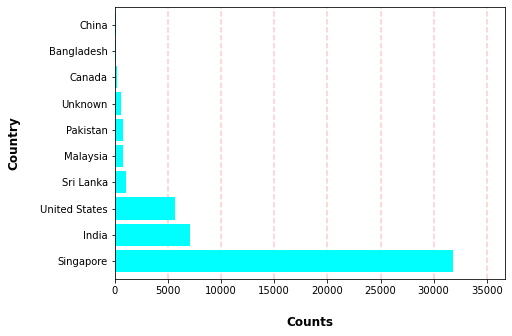

In [196]:
# Number of messages per country
country_value_counts = df['country'].value_counts()

# Number of messages per country for the top 10 most active countries
top_10_country_value_counts = country_value_counts.head(10)

# Plot a bar chart using pandas built-in plotting apis
ax = top_10_country_value_counts.plot(kind='barh', figsize=(7,5), color='cyan', zorder=2, width=0.85)

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.2, color='red', zorder=1)

# Set x-axis label
ax.set_xlabel("Counts", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Country", labelpad=20, weight='bold', size=12)

Here I can say that users from Singapore, India and United States sent the majority of message.

### Sentiment Analysis
I will move on to sentiment analysis. There are several approaches one can take to analyzing sentiment of text data, and I will primarily use models from the NLTK library. Here a message will be categorized into one of two categories:
- Positve
- Negative

I will use `Naive Bayes` classification to determining the sentiment of the `messages` in the Message variable. This will involve using Twitter data with known sentiments to create a classifier.

In [197]:
# Download twitter data and sentiment analysis model
nltk.download('twitter_samples')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

After downloading the Twitter data from the `nltk` library, I will import it from `nltk.corpus` as `twitter_samples`.

In [198]:
# import twitter data
from nltk.corpus import twitter_samples

<b>First step is to instantiate the tweets that have been labeled as positive and negative, in order to create a training set that can be fed into the classifier.</b>

In [199]:
# Instantiate positive tweets
positive_tweets = twitter_samples.strings('positive_tweets.json')
# Instantiate negative tweets
negative_tweets = twitter_samples.strings('negative_tweets.json')

In [200]:
# View first positive tweet
print(positive_tweets[0])
# View number of positive tweets
print(f"There are {len(positive_tweets)} positive tweets.")

#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
There are 5000 positive tweets.


In [201]:
# View first negative tweet
print(negative_tweets[0])
# View number of positive tweets
print(f"There are {len(negative_tweets)} negative tweets.")

hopeless for tmr :(
There are 5000 negative tweets.


the number of positive to negative samples used to assemble the training set is evenly distributed. 

<b>I need to tokenize the tweets.</b>

In [202]:
# Create tokens from the positive tweets
pos_tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
# Show the first tokenized tweet
print(pos_tweet_tokens[0])

['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week', ':)']


In [203]:
# Create tokens from the negative tweets
neg_tweet_tokens = twitter_samples.tokenized('negative_tweets.json')
# Show the first tokenized tweet
print(neg_tweet_tokens[0])

['hopeless', 'for', 'tmr', ':(']


Since I removed HTML tags and URLs in the SMS data, I'll do the same for the tweets. I'll use the same functions for this as I defined above.

In [204]:
# Define lists for preprocessed tokens
positive_cleaned_tweets_list = []
negative_cleaned_tweets_list = []

# positive tokens
for tweet in pos_tweet_tokens:
    cleaned_tweet = []
    for token in tweet:
        # remove URLs
        url_cleaned = remove_urls(token)
        # remove HTMLs
        html_cleaned = remove_html(url_cleaned)
        cleaned_tweet.append(html_cleaned)
    # Add to list
    positive_cleaned_tweets_list.append(cleaned_tweet)
    
    
# negative tokens
for tweet in neg_tweet_tokens:
    cleaned_tweet = []
    for token in tweet:
        # remove URLs
        url_cleaned = remove_urls(token)
        # remove HTMLs
        html_cleaned = remove_html(url_cleaned)
        cleaned_tweet.append(html_cleaned)
    # Add to list
    negative_cleaned_tweets_list.append(cleaned_tweet)

In [205]:
# Print preprocessed token lists
print(positive_cleaned_tweets_list[:5])
print(negative_cleaned_tweets_list[:5])

[['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week', ':)'], ['@Lamb2ja', 'Hey', 'James', '!', 'How', 'odd', ':/', 'Please', 'call', 'our', 'Contact', 'Centre', 'on', '02392441234', 'and', 'we', 'will', 'be', 'able', 'to', 'assist', 'you', ':)', 'Many', 'thanks', '!'], ['@DespiteOfficial', 'we', 'had', 'a', 'listen', 'last', 'night', ':)', 'As', 'You', 'Bleed', 'is', 'an', 'amazing', 'track', '.', 'When', 'are', 'you', 'in', 'Scotland', '?', '!'], ['@97sides', 'CONGRATS', ':)'], ['yeaaaah', 'yippppy', '!', '!', '!', 'my', 'accnt', 'verified', 'rqst', 'has', 'succeed', 'got', 'a', 'blue', 'tick', 'mark', 'on', 'my', 'fb', 'profile', ':)', 'in', '15', 'days']]
[['hopeless', 'for', 'tmr', ':('], ['Everything', 'in', 'the', 'kids', 'section', 'of', 'IKEA', 'is', 'so', 'cute', '.', 'Shame', "I'm", 'nearly', '19', 'in', '2', 'months', ':('], ['@Hegelbon', 'That', 'heart', 'sliding', 'into', 'th

<b>Now I need to select the features for my classifier.</b>

I will select the most common words in my corpus because I assume that these words are the best indicators if something is positive or negative. I will use a frequency distribution to select them.

In [206]:
#create a list of all the tweets
list_of_all_tweets = positive_cleaned_tweets_list + negative_cleaned_tweets_list

#turn my list of lists into a flat list of tokens
all_tweet_tokens = [token for sublist in list_of_all_tweets for token in sublist]

#check how many words that is
len(all_tweet_tokens)

130084

In [207]:
# Create a frequency distribution of all the words
all_tokens = nltk.FreqDist(token for token in all_tweet_tokens)

# inspect the result
print(len(all_tokens))
print(all_tokens.most_common(10))

22689
[(':(', 4586), (':)', 3693), ('!', 2675), ('I', 2477), ('.', 2433), ('to', 2133), ('you', 2001), ('the', 1845), ('', 1753), (',', 1698)]


In [208]:
# select the top 10,000 words to be our features
sentiment_features = [word for (word, freq) in all_tokens.most_common(10000)]

print(sentiment_features[:20])

[':(', ':)', '!', 'I', '.', 'to', 'you', 'the', '', ',', 'a', 'and', '(', '?', 'for', 'my', 'it', 'in', 'is', 'me']


<b>Create a feature extractor that identifies when a feature is present in a message.</b>

In [209]:
def document_features(document, sentiment_features):
    # make a set list of all the tokens in a message
    document_tokens = set(document)
    features = {}
    # for all my features, check if that features is in my target message
    for token in sentiment_features:
        # make a dictionary for each message
        features[token] = (token in document_tokens)
    return features

# test it on sample sentence
test_sentence = "Write it on your heart that every day is the best day in the year.".split(" ")
print(document_features(test_sentence, sentiment_features))

{':(': False, ':)': False, '!': False, 'I': False, '.': False, 'to': False, 'you': False, 'the': True, '': False, ',': False, 'a': False, 'and': False, '(': False, '?': False, 'for': False, 'my': False, 'it': True, 'in': True, 'is': True, 'me': False, 'i': False, 'of': False, ':-)': False, 'so': False, ':D': False, 'have': False, '...': False, 'on': True, ')': False, 'this': False, 'but': False, 'that': True, ':-(': False, 'be': False, '"': False, ':': False, "I'm": False, 'your': True, 'like': False, 'with': False, 'u': False, 'not': False, 'all': False, 'was': False, 'just': False, 'at': False, 'follow': False, 'are': False, '-': False, 'get': False, 'no': False, 'up': False, 'day': True, 'too': False, 'do': False, '&': False, 'want': False, 'back': False, 'know': False, 'love': False, 'now': False, 'we': False, 'will': False, 'can': False, 'one': False, "it's": False, 'good': False, 'time': False, '..': False, 'out': False, 'miss': False, 'Thanks': False, "don't": False, 'if': False

<b>create training and testing sets</b>, and label them accordingly. 70% of the tweets will be used for the training set, and 30% for the testing set. Using the random library, I can randomly select the tweets for each.

In [210]:
import random

# Create positive and negative datasets from my lists of tokenized tweets
positive_tw = [(tweet, 'Positive') for tweet in positive_cleaned_tweets_list]
negative_tw = [(tweet, 'Negative') for tweet in negative_cleaned_tweets_list]

# Create the combined dataset
all_labeled_tweets = positive_tw + negative_tw

# initialized the random number so I get the same result every time
random.seed(42)
# Shuffle the order of the dataset NOTE that the random method applies in place
random.shuffle(all_labeled_tweets)

#create a list of (token, sentiment) pairs for all the features in the tweets
feature_set = [(document_features(d, sentiment_features), c) for (d, c) in all_labeled_tweets]
# Separate the dataset into the training and testing sets
train_set, test_set = feature_set[:7000], feature_set[7000:]

In [211]:
print(positive_tw[:10])
print('\n',negative_tw[:10])
print('\n', all_labeled_tweets[:5])

[(['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week', ':)'], 'Positive'), (['@Lamb2ja', 'Hey', 'James', '!', 'How', 'odd', ':/', 'Please', 'call', 'our', 'Contact', 'Centre', 'on', '02392441234', 'and', 'we', 'will', 'be', 'able', 'to', 'assist', 'you', ':)', 'Many', 'thanks', '!'], 'Positive'), (['@DespiteOfficial', 'we', 'had', 'a', 'listen', 'last', 'night', ':)', 'As', 'You', 'Bleed', 'is', 'an', 'amazing', 'track', '.', 'When', 'are', 'you', 'in', 'Scotland', '?', '!'], 'Positive'), (['@97sides', 'CONGRATS', ':)'], 'Positive'), (['yeaaaah', 'yippppy', '!', '!', '!', 'my', 'accnt', 'verified', 'rqst', 'has', 'succeed', 'got', 'a', 'blue', 'tick', 'mark', 'on', 'my', 'fb', 'profile', ':)', 'in', '15', 'days'], 'Positive'), (['@BhaktisBanter', '@PallaviRuhail', 'This', 'one', 'is', 'irresistible', ':)', '#FlipkartFashionFriday', ''], 'Positive'), (['We', "don't", 'like', 'to', 'keep', 

In [212]:
print(feature_set[0])

({':(': False, ':)': True, '!': False, 'I': False, '.': False, 'to': False, 'you': False, 'the': False, '': False, ',': False, 'a': False, 'and': False, '(': False, '?': False, 'for': False, 'my': False, 'it': False, 'in': False, 'is': False, 'me': True, 'i': False, 'of': False, ':-)': False, 'so': False, ':D': False, 'have': False, '...': False, 'on': False, ')': False, 'this': False, 'but': False, 'that': False, ':-(': False, 'be': False, '"': False, ':': False, "I'm": False, 'your': False, 'like': False, 'with': False, 'u': False, 'not': False, 'all': False, 'was': False, 'just': False, 'at': False, 'follow': False, 'are': False, '-': False, 'get': False, 'no': False, 'up': False, 'day': False, 'too': False, 'do': False, '&': False, 'want': False, 'back': False, 'know': False, 'love': False, 'now': False, 'we': False, 'will': False, 'can': False, 'one': False, "it's": False, 'good': False, 'time': False, '..': False, 'out': False, 'miss': False, 'Thanks': False, "don't": False, 'if'

<b>Use the NaiveBayesClassifier model </b> with my training and testing sets to build my sentiment model. I will use the classify() function to test the performance of my model on my training set.

In [213]:
from nltk import classify
from nltk import NaiveBayesClassifier

# Instantiate a classifier and train on training data
classifier = nltk.NaiveBayesClassifier.train(train_set)

# Evaluate the model with classify() function
print('Accuracy is ', classify.accuracy(classifier, test_set))

Accuracy is  0.9966666666666667


In [214]:
#Show the 20 most informative features for prediction
print(classifier.show_most_informative_features(20))

Most Informative Features
                      :( = True           Negati : Positi =   2060.9 : 1.0
                      :) = True           Positi : Negati =   1649.1 : 1.0
                    miss = True           Negati : Positi =     31.1 : 1.0
                     See = True           Positi : Negati =     29.3 : 1.0
                     sad = True           Negati : Positi =     23.6 : 1.0
                  THANKS = True           Negati : Positi =     22.6 : 1.0
                  FOLLOW = True           Negati : Positi =     21.9 : 1.0
                  Thanks = True           Positi : Negati =     21.1 : 1.0
                     x15 = True           Negati : Positi =     19.9 : 1.0
                 arrived = True           Positi : Negati =     17.6 : 1.0
                 welcome = True           Positi : Negati =     17.2 : 1.0
                   Thank = True           Positi : Negati =     17.0 : 1.0
                     TOO = True           Negati : Positi =     14.4 : 1.0

Use my model to classify the sentiment of my messages. I will try it out on just one before applying it to the whole corpus.

In [215]:
# Select one sample message to evaluate
sample_message = str(df['Message_tokenized'][49])
print(sample_message)

# print prediction of sentiment
print(classifier.classify(dict([token, True] for token in sample_message)))

['yup', 'hey', 'then', 'one', 'day', 'on', 'fri', 'we', 'can', 'ask', 'miwa', 'and', 'jiayin', 'take', 'leave', 'go', 'karaoke']
Negative


The sentiment of the 50th message `("yup hey then one day on fri we can ask miwa and jiayin take leave go karaoke")` is Negative per my model.

<b>Evaluate all the message in the NUS SMS CORPUS<\b>

In [216]:
sentiments = []

# Iterate through the column and predict each response's sentiment, append sentiment to new list
for message in df['Message_tokenized']:
    sentiments.append(str(classifier.classify(dict([token, True] for token in message))))
    
# add the list back to our DataFrame
df['Sentiment'] = sentiments

df['Sentiment'].value_counts()

Negative    31228
Positive    17367
Name: Sentiment, dtype: int64

I want to know what portion of the data is Positive/Negative. So I will use the `value_counts()` method and set `normalize = True` so I get the proportion instead of raw counts.

In [217]:
# View the proportion of the corpus in each class
df['Sentiment'].value_counts(normalize=True)

Negative    0.642618
Positive    0.357382
Name: Sentiment, dtype: float64

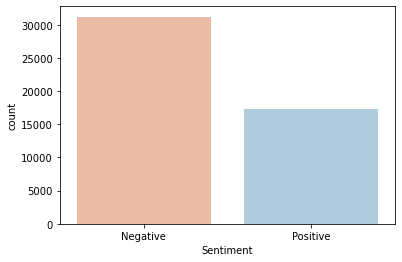

In [218]:
# View distribution in a countplot
sns.countplot(data=df, x='Sentiment', palette='RdBu')

plt.savefig("Sentiment.png")

My model predict that 63.4% of the messages in the NUS SMS Corpus are Negative.

Now I will compare sentiment by country. To make it easier, I will transform my sentiment into numeric variable. I will assign positive message '1' and negative '-1'

In [219]:
# Define a function to convert sentiment into binary values
def convert_sentiment(sentiment):
    """
    Takes in sentiments, and converts them to binary values.
    """
    if sentiment == 'Positive':
        return 1
    else:
        return -1
    
# Create new feature based on the values returned from function
df['Sentiment_score'] = df['Sentiment'].apply(convert_sentiment)

# check
df.head()

,id,Message,length,country,Date,Message_clean,Message_tokenized,Sentiment,Sentiment_score
0,10120,Bugis oso near wat...,21,Singapore,2003/4,bugis oso near wat,"[bugis, oso, near, wat]",Negative,-1
1,10121,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,Singapore,2003/4,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, cine, there, got, amore, wat]",Negative,-1
2,10122,I dunno until when... Lets go learn pilates...,46,Singapore,2003/4,i dunno until when lets go learn pilates,"[i, dunno, until, when, lets, go, learn, pilates]",Negative,-1
3,10123,"Den only weekdays got special price... Haiz... Cant eat liao... Cut nails oso muz wait until i finish drivin wat, lunch still muz eat wat...",140,Singapore,2003/4,den only weekdays got special price haiz cant eat liao cut nails oso muz wait until i finish drivin wat lunch still muz eat wat,"[den, only, weekdays, got, special, price, haiz, cant, eat, liao, cut, nails, oso, muz, wait, until, i, finish, drivin, wat, lunch, still, muz, eat, wat]",Negative,-1
4,10124,Meet after lunch la...,22,Singapore,2003/4,meet after lunch la,"[meet, after, lunch, la]",Negative,-1


I want group by country ans use `.mean()` method to get the average sentiment score for each country.

In [220]:
#create a new dataframe grouped by countries and aggregated by the mean.
df_sent = df.groupby(["country"]).mean()

# reset the index
df_sent.reset_index(inplace=True)

df_sent.head()

,country,id,Sentiment_score
0,Australia,45574.666667,0.111111
1,Bangladesh,39876.301587,-0.190476
2,Barbados,45633.500000,-1.000000
3,Canada,5763.035354,-0.252525
4,China,12499.878505,-0.177570


I want to know which country sends the most positive message. I will use `sort_values()` method

In [221]:
# Sort DataFrame by Sentiment_score
df_sent.sort_values(by='Sentiment_score')

,country,id,Sentiment_score
13,Lebanon,41975.500000,-1.000000
2,Barbados,45633.500000,-1.000000
19,Nigeria,41682.500000,-0.600000
25,Slovenia,41282.500000,-0.600000
29,Turkey,45643.500000,-0.600000
22,Romania,41232.000000,-0.555556
11,Jamaica,45285.250000,-0.500000
10,Italia,45593.500000,-0.400000
24,Singapore,23200.872835,-0.378131
21,Philippines,39688.328358,-0.283582


Plot the sentiment by country to see which countries are the most positive/negative

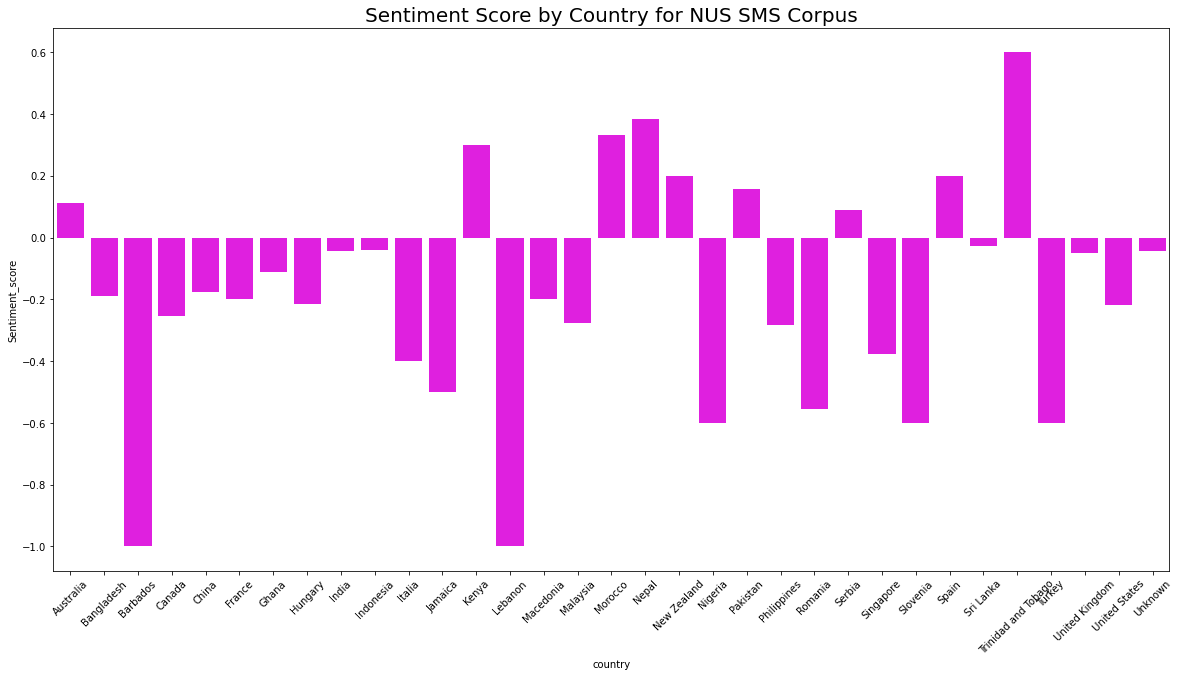

<Figure size 432x288 with 0 Axes>

In [222]:
# Plot general sentiments
plt.figure(figsize=(20, 10))
sns.barplot(data=df_sent, x="country", y="Sentiment_score", color='fuchsia')
plt.title('Sentiment Score by Country for NUS SMS Corpus', fontsize=20)
plt.xticks(rotation=45)

plt.show()
plt.savefig('sentiment_country.png')